In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = to_categorical(Y_train, 10)
Y_test = to_categorical(Y_test, 10)

11493376/11490434 [==============================] - 2s 0us/step


In [12]:
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [14]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [15]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback, checkpointer])


Epoch 00001: val_loss improved from inf to 0.15770, saving model to ./model/01-0.1577.hdf5

Epoch 00002: val_loss improved from 0.15770 to 0.10516, saving model to ./model/02-0.1052.hdf5

Epoch 00003: val_loss improved from 0.10516 to 0.08669, saving model to ./model/03-0.0867.hdf5

Epoch 00004: val_loss improved from 0.08669 to 0.07631, saving model to ./model/04-0.0763.hdf5

Epoch 00005: val_loss improved from 0.07631 to 0.06548, saving model to ./model/05-0.0655.hdf5

Epoch 00006: val_loss did not improve from 0.06548

Epoch 00007: val_loss did not improve from 0.06548

Epoch 00008: val_loss improved from 0.06548 to 0.05939, saving model to ./model/08-0.0594.hdf5

Epoch 00009: val_loss did not improve from 0.05939

Epoch 00010: val_loss did not improve from 0.05939

Epoch 00011: val_loss did not improve from 0.05939

Epoch 00012: val_loss did not improve from 0.05939

Epoch 00013: val_loss did not improve from 0.05939

Epoch 00014: val_loss did not improve from 0.05939

Epoch 00015

In [16]:
print("\n Test Accuracy: %.4f" %(model.evaluate(X_test, Y_test)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

10000/10000 [==============================] - 1s 119us/sample - loss: 0.1135 - accuracy: 0.9709

 Test Accuracy: 0.9709


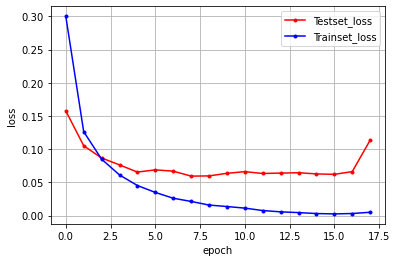

In [17]:
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Testset_loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Trainset_loss")

plt.legend(loc="upper right")

plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()